Assessment 2 for OSESM.

In [55]:
import pyam
import matplotlib.pyplot as plt

Import Data from https://data.ece.iiasa.ac.at/ar6


In [23]:
df = pyam.IamDataFrame('ar6_prim-energy_electricity.xlsx')
df

pyam.core - INFO: Reading file ar6_prim-energy_electricity.xlsx


<class 'pyam.core.IamDataFrame'>
Index:
 * model    : MESSAGEix-GLOBIOM_1.1 (1)
 * scenario : EN_INDCi2030_1000, EN_INDCi2030_2500 (2)
Timeseries data coordinates:
   region   : World (1)
   variable : Emissions|CO2, Primary Energy, Secondary Energy|Electricity (3)
   unit     : EJ/yr, Mt CO2/yr (2)
   year     : 2000, 2005, 2010, 2015, 2020, 2025, 2030, 2035, ... 2100 (17)
Meta indicators:
   exclude (bool) False (1)

daten filtern und anzeigen

In [53]:
model = "MESSAGEix-GLOBIOM_1.1"

data = df.filter(model = model, 
                 scenario = ['EN_INDCi2030*'], 
                 variable=['Primary Energy', 'Secondary Energy*', 'Emissions|CO2'],
                 year = range(2000,2090))
data

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : MESSAGEix-GLOBIOM_1.1 (1)
 * scenario : EN_INDCi2030_1000, EN_INDCi2030_2500 (2)
Timeseries data coordinates:
   region   : World (1)
   variable : Emissions|CO2, Primary Energy, Secondary Energy|Electricity (3)
   unit     : EJ/yr, Mt CO2/yr (2)
   year     : 2000, 2005, 2010, 2015, 2020, 2025, 2030, 2035, ... 2080 (15)
Meta indicators:
   exclude (bool) False (1)

<AxesSubplot:title={'center':'model: MESSAGEix-GLOBIOM_1.1 - region: World - variable: Primary Energy'}, xlabel='Year', ylabel='EJ/yr'>

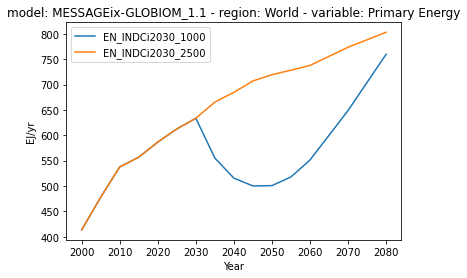

In [114]:
#test

model = "MESSAGEix-GLOBIOM_1.1"

data = df.filter(model = model, 
                 scenario = ['EN_INDCi2030*'], 
                 variable=['Primary Energy'],
                 year = range(2000,2090))
data
data.plot()

Make multilayer plots

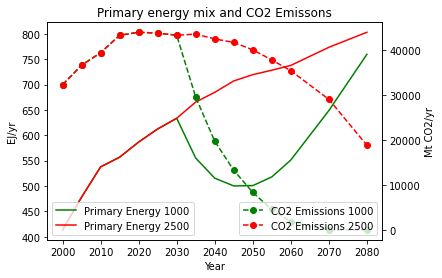

In [113]:
fig, ax = plt.subplots()

#filter data
data_energy_1000 = df.filter(model = model, 
                             scenario = ['EN_INDCi2030_1000'], 
                             variable=['Primary Energy'],
                             year = range(2000,2090))
data_energy_2500 = df.filter(model = model, 
                             scenario = ['EN_INDCi2030_2500'], 
                             variable=['Primary Energy'],
                             year = range(2000,2090))

data_emissions_1000 = df.filter(model = model, 
                                scenario = ['EN_INDCi2030_1000'], 
                                variable=['Emissions*'],
                                year = range(2000,2090))
data_emissions_2500 = df.filter(model = model, 
                                scenario = ['EN_INDCi2030_2500'], 
                                variable=['Emissions*'],
                                year = range(2000,2090))

#plot data
format_kwargs = dict(legend=False, title=None)
data_energy_1000.plot(ax=ax, color = 'g', label="Primary Energy 1000")
data_energy_2500.plot(ax=ax, color = 'r', label="Primary Energy 2500")

#generate a second (hidden) x-axis
ax2 = ax.twinx()

format_kwargs = dict(legend=False, title=None, linestyle="--", marker="o")
data_emissions_1000.plot(ax=ax2, **format_kwargs, color = 'g', label="CO2 Emissions 1000")
data_emissions_2500.plot(ax=ax2, **format_kwargs, color = 'r', label="CO2 Emissions 2500")



ax.legend(loc=3)
ax2.legend(loc=4)
ax.set_title("Primary energy mix and CO2 Emissons")

plt.show()